In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt

In [3]:
from fundamental_matrix import keypoint_matcher, get_fundamental_matrix, draw_epipolar_lines, get_fundamental_matrix_ransac

# Matching

In [4]:
image1 = cv.imread("../Data/House/frame00000001.png")
image2 = cv.imread("../Data/House/frame00000049.png")

Before filtering neighbours: 543. After: 154


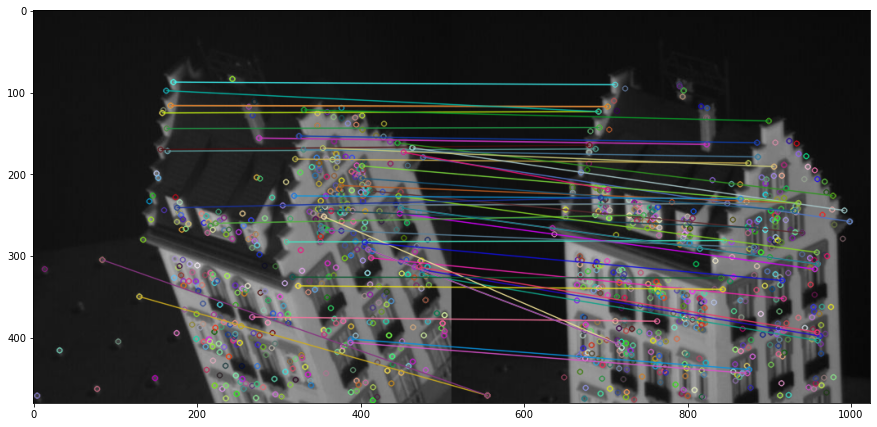

In [5]:
matches, matched_points1, matched_points2, kp1, kp2 = keypoint_matcher(image1, image2, 
                                                                       n_points=50, 
                                                                       random_selection=False, 
                                                                       filter_neighbours=True, 
                                                                       draw_matches=True)

In [335]:
sorted(matched_points1, key=lambda x: x[0])

[(84.29541778564453, 304.6900939941406),
 (129.69342041015625, 349.5918884277344),
 (155.6320037841797, 169.92083740234375),
 (157.66387939453125, 125.26329040527344),
 (162.50405883789062, 98.03905487060547),
 (162.98277282714844, 144.24075317382812),
 (164.10728454589844, 171.78672790527344),
 (167.96371459960938, 116.2098159790039),
 (167.96371459960938, 116.2098159790039),
 (171.3076934814453, 87.54822540283203),
 (175.88623046875, 241.01461791992188),
 (223.0852813720703, 259.9809265136719),
 (267.6719970703125, 374.4859924316406),
 (276.1034851074219, 155.9117889404297),
 (276.1034851074219, 155.9117889404297),
 (305.0368957519531, 238.22012329101562),
 (309.75897216796875, 282.7580261230469),
 (317.0397033691406, 325.7002868652344),
 (318.9856872558594, 226.48374938964844),
 (320.30938720703125, 181.56515502929688),
 (323.9646301269531, 336.4670104980469),
 (325.0824279785156, 153.42918395996094),
 (330.4867858886719, 170.00547790527344),
 (330.986328125, 121.461669921875),
 (35

In [336]:
sorted(matched_points2, key=lambda x: x[0])

[(43.50304412841797, 470.3285217285156),
 (43.50304412841797, 470.3285217285156),
 (168.41525268554688, 164.57261657714844),
 (175.87417602539062, 169.19515991210938),
 (179.41726684570312, 123.55265808105469),
 (179.41726684570312, 123.55265808105469),
 (180.32879638671875, 142.99551391601562),
 (182.4463348388672, 228.87322998046875),
 (190.5642547607422, 117.45438385009766),
 (190.5642547607422, 117.45438385009766),
 (190.80255126953125, 218.67315673828125),
 (199.7759552001953, 90.6645278930664),
 (203.7765350341797, 407.791259765625),
 (203.7765350341797, 407.791259765625),
 (203.7765350341797, 407.791259765625),
 (234.574951171875, 250.08499145507812),
 (251.11444091796875, 379.6087646484375),
 (311.77545166015625, 163.61129760742188),
 (311.77545166015625, 163.61129760742188),
 (329.6985168457031, 326.8335266113281),
 (331.45733642578125, 340.6944274902344),
 (332.9710998535156, 281.09259033203125),
 (336.94451904296875, 235.83653259277344),
 (353.26153564453125, 230.06072998046

# Normalization

In [6]:
from fundamental_matrix import normalize_points

In [7]:
matched_points1_norm, T = normalize_points(matched_points1)

mean x: 329.13, mean y: 229.54, average distance to the mean: 121.591


Check and show that the set of points {p_hat} with homogeneous coordinates satisfies our criteria.

In [8]:
normalize_points(matched_points1_norm);

mean x: 0.0, mean y: -0.0, average distance to the mean: 1.414


In [9]:
matched_points2_norm, T_prime = normalize_points(matched_points2)

mean x: 323.659, mean y: 267.613, average distance to the mean: 141.221


In [10]:
normalize_points(matched_points2_norm);

mean x: 0.0, mean y: -0.0, average distance to the mean: 1.414


# Fundamental matrix

In [11]:
F = get_fundamental_matrix(matched_points1, matched_points2, normalize=True)
F

mean x: 329.13, mean y: 229.54, average distance to the mean: 121.591
mean x: 323.659, mean y: 267.613, average distance to the mean: 141.221
U, D, V_t = np.linalg.svd(A) (50, 50) (9,) (9, 9)
V_t.T[:, n - 1]
[-0.10420541 -0.01030531 -0.35395098  0.07434447 -0.02118717 -0.56847367
  0.26369273  0.66576811  0.14776467]
(9,)
F
[[-0.10420541 -0.01030531 -0.35395098]
 [ 0.07434447 -0.02118717 -0.56847367]
 [ 0.26369273  0.66576811  0.14776467]]
(3, 3)
FD_prime [0.78310288 0.61037153 0.11914897]
FD_prime with the smallest singular value zeroed [0.78310288 0.61037153 0.        ]


array([[-1.15620803e-06, -5.76316575e-06, -1.81251737e-03],
       [ 2.11573948e-06,  2.51210334e-07, -6.46385567e-03],
       [ 2.95898752e-03,  9.50664120e-03, -3.42069838e-01]])

In [12]:
cv.findFundamentalMat(np.float32(matched_points1), np.float32(matched_points2), cv.FM_LMEDS)

(array([[ 8.50313025e-06,  2.32534932e-05, -3.83919514e-02],
        [-2.26661892e-05,  4.45460235e-06, -2.68679636e-02],
        [ 4.22806252e-02,  1.69479207e-02,  1.00000000e+00]]),
 array([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1]], dtype=uint8))

In [13]:
cv.findFundamentalMat(np.float64(matched_points1), np.float64(matched_points2), cv.FM_8POINT)

(array([[ 1.17753782e-05, -2.15477074e-05, -2.65599122e-02],
        [ 5.86948491e-05, -2.55844674e-06, -8.63261498e-02],
        [ 2.20701310e-02,  7.51985659e-02,  1.00000000e+00]]),
 array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8))

In [14]:
cv.findFundamentalMat(np.float64(matched_points1), np.float64(matched_points2), cv.FM_RANSAC, 1)

(array([[-1.75746311e-06,  2.02888505e-05, -7.33231739e-02],
        [-2.02487782e-05,  8.98889453e-06, -6.32090703e-02],
        [ 9.25380915e-02,  4.17060474e-02,  1.00000000e+00]]),
 array([[0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1]], dtype=uint8))

In [15]:
F = get_fundamental_matrix_ransac(matched_points1, matched_points2, threshold=1, iterations=1000)

mean x: 343.563, mean y: 236.294, average distance to the mean: 87.626
mean x: 334.478, mean y: 274.689, average distance to the mean: 114.602
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.04839463 -0.07102026  0.4124619   0.05711381  0.05176773  0.46493166
 -0.3366146  -0.69655972 -0.04337159]
(9,)
F
[[ 0.04839463 -0.07102026  0.4124619 ]
 [ 0.05711381  0.05176773  0.46493166]
 [-0.3366146  -0.69655972 -0.04337159]]
(3, 3)
FD_prime [0.7849445  0.61854283 0.03559354]
FD_prime with the smallest singular value zeroed [0.7849445  0.61854283 0.        ]
mean x: 394.312, mean y: 222.539, average distance to the mean: 91.365
mean x: 406.249, mean y: 273.461, average distance to the mean: 91.266
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.03947293 -0.01683668  0.49288295  0.01207843  0.00975404  0.54400571
 -0.28005382 -0.61255706 -0.07338437]
(9,)
F
[[ 0.03947293 -0.01683668  0.49288295]
 [ 0.01207843  0.00975404  0.54400571]
 [-0.28005382 -0.612

mean x: 333.333, mean y: 207.365, average distance to the mean: 130.862
mean x: 344.634, mean y: 239.829, average distance to the mean: 137.435
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[-0.02818301  0.09513598  0.6143004  -0.08435112 -0.0283942   0.31083298
 -0.52989967 -0.4769174   0.00274394]
(9,)
F
[[-0.02818301  0.09513598  0.6143004 ]
 [-0.08435112 -0.0283942   0.31083298]
 [-0.52989967 -0.4769174   0.00274394]]
(3, 3)
FD_prime [0.71886804 0.69509194 0.00871353]
FD_prime with the smallest singular value zeroed [0.71886804 0.69509194 0.        ]
mean x: 309.619, mean y: 235.259, average distance to the mean: 121.268
mean x: 316.526, mean y: 271.595, average distance to the mean: 147.057
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[-0.00994281  0.39492356 -0.5071498  -0.48069191  0.01393928  0.00139545
  0.54777072  0.20933959 -0.10769782]
(9,)
F
[[-0.00994281  0.39492356 -0.5071498 ]
 [-0.48069191  0.01393928  0.00139545]
 [ 0.54777072  0.

mean x: 342.472, mean y: 189.768, average distance to the mean: 99.849
mean x: 329.487, mean y: 218.789, average distance to the mean: 116.489
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.15384675 -0.78348205  0.11135745  0.45283854  0.32103242 -0.18363584
 -0.03779973 -0.06184009 -0.05465234]
(9,)
F
[[ 0.15384675 -0.78348205  0.11135745]
 [ 0.45283854  0.32103242 -0.18363584]
 [-0.03779973 -0.06184009 -0.05465234]]
(3, 3)
FD_prime [0.86766079 0.49180568 0.07274563]
FD_prime with the smallest singular value zeroed [0.86766079 0.49180568 0.        ]
mean x: 365.341, mean y: 259.793, average distance to the mean: 107.633
mean x: 344.97, mean y: 303.562, average distance to the mean: 126.971
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.002485   -0.27416192  0.46499878  0.41521308  0.04794134  0.27286715
 -0.36015909 -0.55798296  0.13560569]
(9,)
F
[[ 0.002485   -0.27416192  0.46499878]
 [ 0.41521308  0.04794134  0.27286715]
 [-0.36015909 -0.55

mean x: 349.666, mean y: 250.0, average distance to the mean: 118.262
mean x: 322.961, mean y: 320.693, average distance to the mean: 168.319
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[-0.09022921  0.21015792 -0.43329769 -0.24627473  0.05048184 -0.26456641
  0.49828054  0.61185027  0.06407934]
(9,)
F
[[-0.09022921  0.21015792 -0.43329769]
 [-0.24627473  0.05048184 -0.26456641]
 [ 0.49828054  0.61185027  0.06407934]]
(3, 3)
FD_prime [0.80701275 0.58534361 0.07812351]
FD_prime with the smallest singular value zeroed [0.80701275 0.58534361 0.        ]
mean x: 415.216, mean y: 267.746, average distance to the mean: 72.391
mean x: 396.735, mean y: 324.414, average distance to the mean: 100.9
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[-0.1710397  -0.14779895  0.41259368  0.28733408  0.09174322  0.33896255
 -0.32106472 -0.66951567  0.14649322]
(9,)
F
[[-0.1710397  -0.14779895  0.41259368]
 [ 0.28733408  0.09174322  0.33896255]
 [-0.32106472 -0.66951

mean x: 318.189, mean y: 228.262, average distance to the mean: 98.939
mean x: 316.387, mean y: 261.759, average distance to the mean: 127.479
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.05386698 -0.24107317  0.51050414  0.17387884  0.0560325   0.27278341
 -0.55676381 -0.50803163  0.05001247]
(9,)
F
[[ 0.05386698 -0.24107317  0.51050414]
 [ 0.17387884  0.0560325   0.27278341]
 [-0.55676381 -0.50803163  0.05001247]]
(3, 3)
FD_prime [0.79007911 0.61197716 0.03548187]
FD_prime with the smallest singular value zeroed [0.79007911 0.61197716 0.        ]
mean x: 307.274, mean y: 213.468, average distance to the mean: 163.589
mean x: 315.326, mean y: 264.478, average distance to the mean: 181.064
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.06274678  0.06390586 -0.67107649 -0.01164228 -0.02385654 -0.00739499
  0.71197254  0.16294517 -0.08613849]
(9,)
F
[[ 0.06274678  0.06390586 -0.67107649]
 [-0.01164228 -0.02385654 -0.00739499]
 [ 0.71197254  0.1

U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.16569678 -0.55482772 -0.13911946  0.56670051  0.17030711 -0.35735083
  0.0278735   0.40824979  0.00762559]
(9,)
F
[[ 0.16569678 -0.55482772 -0.13911946]
 [ 0.56670051  0.17030711 -0.35735083]
 [ 0.0278735   0.40824979  0.00762559]]
(3, 3)
FD_prime [0.71100358 0.70318662 0.00157385]
FD_prime with the smallest singular value zeroed [0.71100358 0.70318662 0.        ]
mean x: 308.859, mean y: 177.778, average distance to the mean: 145.185
mean x: 321.13, mean y: 232.164, average distance to the mean: 168.92
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[-0.06950588  0.02685708 -0.21409916  0.05272685 -0.1309815  -0.64775971
  0.11588393  0.67446946  0.20184681]
(9,)
F
[[-0.06950588  0.02685708 -0.21409916]
 [ 0.05272685 -0.1309815  -0.64775971]
 [ 0.11588393  0.67446946  0.20184681]]
(3, 3)
FD_prime [0.84204774 0.53129045 0.09319903]
FD_prime with the smallest singular value zeroed [0.84204774 0.53129045 

mean x: 299.98, mean y: 234.86, average distance to the mean: 145.531
mean x: 259.827, mean y: 299.731, average distance to the mean: 182.739
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[-0.0668206   0.32924282 -0.00286007 -0.2295949  -0.42670428 -0.3707106
 -0.2359534   0.49996361  0.45746221]
(9,)
F
[[-0.0668206   0.32924282 -0.00286007]
 [-0.2295949  -0.42670428 -0.3707106 ]
 [-0.2359534   0.49996361  0.45746221]]
(3, 3)
FD_prime [0.91898028 0.33287098 0.21135789]
FD_prime with the smallest singular value zeroed [0.91898028 0.33287098 0.        ]
mean x: 366.853, mean y: 228.056, average distance to the mean: 68.082
mean x: 362.388, mean y: 266.281, average distance to the mean: 90.525
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[-0.17617053  0.08279189 -0.18937265  0.15113891 -0.22959711 -0.59081692
  0.0543334   0.66162474  0.24683109]
(9,)
F
[[-0.17617053  0.08279189 -0.18937265]
 [ 0.15113891 -0.22959711 -0.59081692]
 [ 0.0543334   0.66162

mean x: 372.066, mean y: 236.59, average distance to the mean: 86.481
mean x: 381.181, mean y: 275.32, average distance to the mean: 87.307
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.07030391 -0.11365829 -0.1458561   0.22675011 -0.01012076  0.61799659
  0.49703325 -0.50949986 -0.14420526]
(9,)
F
[[ 0.07030391 -0.11365829 -0.1458561 ]
 [ 0.22675011 -0.01012076  0.61799659]
 [ 0.49703325 -0.50949986 -0.14420526]]
(3, 3)
FD_prime [7.44346755e-01 6.67793088e-01 5.47667746e-04]
FD_prime with the smallest singular value zeroed [0.74434676 0.66779309 0.        ]
mean x: 335.964, mean y: 236.238, average distance to the mean: 127.365
mean x: 315.958, mean y: 258.154, average distance to the mean: 132.281
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.22481042 -0.46396998  0.10268517  0.3782158   0.13147016  0.42289402
  0.14619101 -0.58484557 -0.14512337]
(9,)
F
[[ 0.22481042 -0.46396998  0.10268517]
 [ 0.3782158   0.13147016  0.42289402]
 [ 0.1461

FD_prime [0.88463134 0.46612444 0.01246631]
FD_prime with the smallest singular value zeroed [0.88463134 0.46612444 0.        ]
mean x: 268.714, mean y: 223.635, average distance to the mean: 134.205
mean x: 224.007, mean y: 281.024, average distance to the mean: 164.222
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.21146622 -0.19057724  0.20029958  0.80821972  0.15705159  0.02948165
 -0.43226222  0.04785318 -0.10463453]
(9,)
F
[[ 0.21146622 -0.19057724  0.20029958]
 [ 0.80821972  0.15705159  0.02948165]
 [-0.43226222  0.04785318 -0.10463453]]
(3, 3)
FD_prime [0.95067454 0.30990999 0.01318032]
FD_prime with the smallest singular value zeroed [0.95067454 0.30990999 0.        ]
mean x: 316.295, mean y: 219.06, average distance to the mean: 127.978
mean x: 331.773, mean y: 241.525, average distance to the mean: 125.815
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.00594676  0.15174702  0.40776699 -0.128074   -0.01820345  0.5724583
 -0.24382422 -

FD_prime with the smallest singular value zeroed [0.75673942 0.64858653 0.        ]
mean x: 309.735, mean y: 193.21, average distance to the mean: 81.556
mean x: 345.962, mean y: 203.596, average distance to the mean: 90.317
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[-0.0388653  -0.00417697 -0.45353218  0.00213288 -0.03282114 -0.51666194
  0.29692048  0.65498976  0.08709709]
(9,)
F
[[-0.0388653  -0.00417697 -0.45353218]
 [ 0.00213288 -0.03282114 -0.51666194]
 [ 0.29692048  0.65498976  0.08709709]]
(3, 3)
FD_prime [0.76685016 0.64084283 0.03551483]
FD_prime with the smallest singular value zeroed [0.76685016 0.64084283 0.        ]
mean x: 318.381, mean y: 207.054, average distance to the mean: 111.273
mean x: 312.832, mean y: 238.703, average distance to the mean: 137.551
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.04709674 -0.21078527 -0.39596909 -0.04304044  0.21846808 -0.43778102
  0.25364591  0.7002983   0.02393725]
(9,)
F
[[ 0.04709674 

mean x: 356.013, mean y: 229.957, average distance to the mean: 83.702
mean x: 350.172, mean y: 266.212, average distance to the mean: 102.347
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.03698922  0.00235234  0.45071339  0.05168968 -0.02106264  0.46264456
 -0.32410464 -0.68784796  0.01223241]
(9,)
F
[[ 0.03698922  0.00235234  0.45071339]
 [ 0.05168968 -0.02106264  0.46264456]
 [-0.32410464 -0.68784796  0.01223241]]
(3, 3)
FD_prime [0.76059774 0.64903631 0.01558666]
FD_prime with the smallest singular value zeroed [0.76059774 0.64903631 0.        ]
mean x: 345.396, mean y: 249.561, average distance to the mean: 136.12
mean x: 287.139, mean y: 292.907, average distance to the mean: 151.134
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.40699363 -0.45983236 -0.05626927 -0.531152    0.38902234 -0.34501557
  0.01794283  0.20059209  0.16336597]
(9,)
F
[[ 0.40699363 -0.45983236 -0.05626927]
 [-0.531152    0.38902234 -0.34501557]
 [ 0.01794283  0.20

mean x: 344.246, mean y: 207.455, average distance to the mean: 96.09
mean x: 333.752, mean y: 231.731, average distance to the mean: 110.38
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[-0.00236418 -0.24848485 -0.23821729  0.21698987  0.07376583 -0.58450788
  0.07341589  0.69173891  0.05860156]
(9,)
F
[[-0.00236418 -0.24848485 -0.23821729]
 [ 0.21698987  0.07376583 -0.58450788]
 [ 0.07341589  0.69173891  0.05860156]]
(3, 3)
FD_prime [0.75277196 0.65682891 0.04370537]
FD_prime with the smallest singular value zeroed [0.75277196 0.65682891 0.        ]
mean x: 284.571, mean y: 226.365, average distance to the mean: 119.738
mean x: 296.858, mean y: 262.756, average distance to the mean: 140.306
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.00152026  0.52004165 -0.11387354 -0.71356422 -0.2500977   0.03894584
 -0.14578337  0.18615019  0.29570759]
(9,)
F
[[ 0.00152026  0.52004165 -0.11387354]
 [-0.71356422 -0.2500977   0.03894584]
 [-0.14578337  0.186

FD_prime [0.82075077 0.57086702 0.02188673]
FD_prime with the smallest singular value zeroed [0.82075077 0.57086702 0.        ]
mean x: 316.269, mean y: 230.278, average distance to the mean: 98.788
mean x: 301.284, mean y: 242.922, average distance to the mean: 104.894
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.0895091   0.08164572  0.29652971 -0.06713091 -0.02144796  0.64671746
 -0.10202757 -0.68046757 -0.02713748]
(9,)
F
[[ 0.0895091   0.08164572  0.29652971]
 [-0.06713091 -0.02144796  0.64671746]
 [-0.10202757 -0.68046757 -0.02713748]]
(3, 3)
FD_prime [0.72402788 0.68325141 0.09461043]
FD_prime with the smallest singular value zeroed [0.72402788 0.68325141 0.        ]
mean x: 395.761, mean y: 286.635, average distance to the mean: 87.032
mean x: 370.974, mean y: 336.467, average distance to the mean: 113.999
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 1.86873872e-04  3.65305465e-02  4.07650699e-01 -6.17660015e-02
 -8.18009368e-03  5.14

mean x: 349.557, mean y: 198.708, average distance to the mean: 121.139
mean x: 335.478, mean y: 230.207, average distance to the mean: 142.776
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[-0.27733452  0.49079005 -0.32347133 -0.30540019 -0.27118359 -0.23906074
  0.04761883  0.56501664  0.17918084]
(9,)
F
[[-0.27733452  0.49079005 -0.32347133]
 [-0.30540019 -0.27118359 -0.23906074]
 [ 0.04761883  0.56501664  0.17918084]]
(3, 3)
FD_prime [0.79698179 0.5951302  0.10315069]
FD_prime with the smallest singular value zeroed [0.79698179 0.5951302  0.        ]
mean x: 358.652, mean y: 220.887, average distance to the mean: 74.03
mean x: 386.452, mean y: 244.163, average distance to the mean: 79.93
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.04788309 -0.1037113   0.46243787  0.12379778  0.05389129  0.53507261
 -0.28716417 -0.62037383 -0.03525027]
(9,)
F
[[ 0.04788309 -0.1037113   0.46243787]
 [ 0.12379778  0.05389129  0.53507261]
 [-0.28716417 -0.6203

FD_prime [0.77535336 0.62542201 0.08760406]
FD_prime with the smallest singular value zeroed [0.77535336 0.62542201 0.        ]
mean x: 341.058, mean y: 214.723, average distance to the mean: 122.722
mean x: 332.954, mean y: 264.661, average distance to the mean: 145.78
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[-0.0228706   0.00785846 -0.52876907 -0.00488517 -0.02502996 -0.37043751
  0.48454716  0.58757443  0.04375475]
(9,)
F
[[-0.0228706   0.00785846 -0.52876907]
 [-0.00488517 -0.02502996 -0.37043751]
 [ 0.48454716  0.58757443  0.04375475]]
(3, 3)
FD_prime [0.7699523  0.63768942 0.02292726]
FD_prime with the smallest singular value zeroed [0.7699523  0.63768942 0.        ]
mean x: 371.006, mean y: 259.541, average distance to the mean: 95.854
mean x: 380.631, mean y: 294.242, average distance to the mean: 89.982
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[-0.02381419 -0.08727205  0.63789178  0.09209868  0.02228797  0.23968762
 -0.55566484 -0

V_t.T[:, n - 1]
[-0.06341454  0.162114   -0.31347229 -0.30599822 -0.01054124 -0.57297676
  0.01962803  0.66170268  0.10558729]
(9,)
F
[[-0.06341454  0.162114   -0.31347229]
 [-0.30599822 -0.01054124 -0.57297676]
 [ 0.01962803  0.66170268  0.10558729]]
(3, 3)
FD_prime [0.73279265 0.67491379 0.0866389 ]
FD_prime with the smallest singular value zeroed [0.73279265 0.67491379 0.        ]
mean x: 320.177, mean y: 250.079, average distance to the mean: 117.785
mean x: 304.41, mean y: 280.999, average distance to the mean: 133.576
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.01933344 -0.02086378  0.46724232  0.1142711  -0.00945459  0.48536931
 -0.29334003 -0.66638786 -0.04498595]
(9,)
F
[[ 0.01933344 -0.02086378  0.46724232]
 [ 0.1142711  -0.00945459  0.48536931]
 [-0.29334003 -0.66638786 -0.04498595]]
(3, 3)
FD_prime [0.74493301 0.66478158 0.05603802]
FD_prime with the smallest singular value zeroed [0.74493301 0.66478158 0.        ]
mean x: 311.938, mean y: 256.996, a

mean x: 355.997, mean y: 275.15, average distance to the mean: 105.367
mean x: 323.579, mean y: 335.029, average distance to the mean: 147.424
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[ 0.06971791 -0.00477121 -0.27981891  0.49082402 -0.33442471 -0.58115458
 -0.04701613  0.41201775  0.23315261]
(9,)
F
[[ 0.06971791 -0.00477121 -0.27981891]
 [ 0.49082402 -0.33442471 -0.58115458]
 [-0.04701613  0.41201775  0.23315261]]
(3, 3)
FD_prime [0.94297644 0.30061404 0.14292179]
FD_prime with the smallest singular value zeroed [0.94297644 0.30061404 0.        ]
mean x: 314.162, mean y: 249.298, average distance to the mean: 133.279
mean x: 288.899, mean y: 300.374, average distance to the mean: 171.74
U, D, V_t = np.linalg.svd(A) (8, 8) (8,) (9, 9)
V_t.T[:, n - 1]
[-0.10452176  0.08700689 -0.23299744 -0.05201203  0.51573089 -0.40236966
  0.43664121  0.53834244 -0.12713821]
(9,)
F
[[-0.10452176  0.08700689 -0.23299744]
 [-0.05201203  0.51573089 -0.40236966]
 [ 0.43664121  0.53

In [16]:
F

array([[-8.31171987e-06,  1.98067280e-06,  1.05412121e-02],
       [-4.63334788e-06, -1.09302226e-06,  2.74223806e-03],
       [-4.05935174e-03, -3.29921195e-03, -9.37459580e-01]])

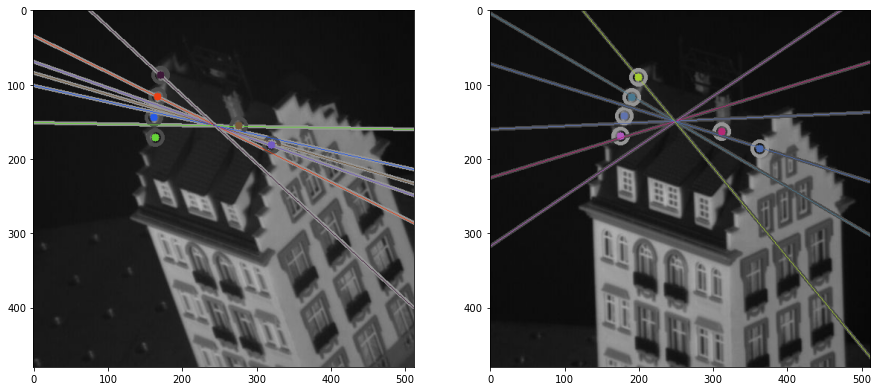

In [248]:
def drawlines(img1, img2, lines, pts1, pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r, c = img1.shape
    img1 = cv.cvtColor(img1, cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2, cv.COLOR_GRAY2BGR)
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
        img1 = cv.line(img1, (x0, y0), (x1, y1), color, 1)
        img1 = cv.circle(img=img1, center=(int(pt1[0]), int(
            pt1[1])), radius=5, color=color, thickness=-1)
        img2 = cv.circle(img2, (int(pt2[0]), int(pt2[1])), 5, color, 2)
    return img1, img2


img1 = cv.cvtColor(image1, cv.COLOR_RGB2GRAY)
img2 = cv.cvtColor(image2, cv.COLOR_RGB2GRAY)


# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv.computeCorrespondEpilines(
    np.float64(matched_points2).reshape(-1, 1, 2), 2, F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1,
                       np.float64(matched_points1),
                       np.float64(matched_points2))
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(
    np.float64(matched_points1).reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2, img1, lines2,
                       np.float64(matched_points2),
                       np.float64(matched_points1))
plt.figure(figsize=(15, 15))
plt.subplot(121), plt.imshow(img5)
plt.subplot(122), plt.imshow(img3)
plt.show()

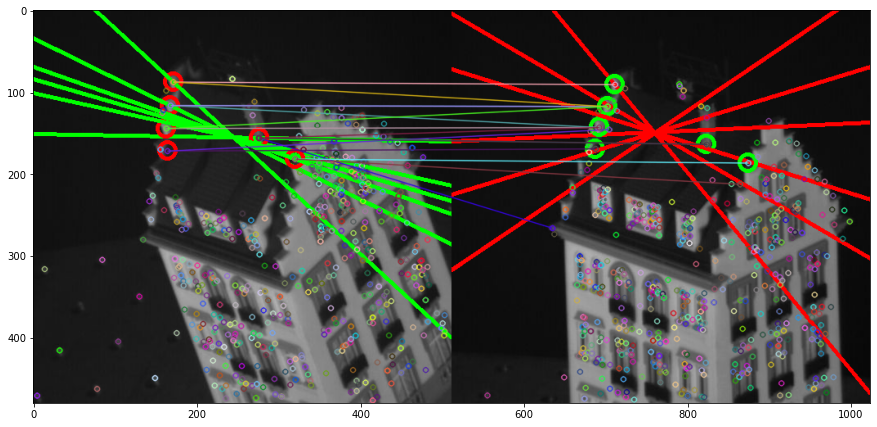

In [246]:
draw_epipolar_lines(image1, image2, matches, kp1, kp2, F)

# Chaining

Construct a point-view matrix for chaining multiple views with the matches found in last step using all consecutive house images (1-2, 2-3, 3-4, ..., 48-49, 49-1). Rows of the point-view matrix will be representing your images while columns will be points. For more details, you can refer to [2].
1. Start from any two consecutive image matches. Add a new column to point-view matrix for each newly introduced point.
2. If a point which is already introduced in the point-view matrix and another image contains that point, mark this matching on your point-view matrix using the previously defined point column. Do not introduce a new column.  

Together with the assignment a sample point view matrix (PointViewMatrix.txt) is provided to test and finish your pipeline (for the ones who have difficult time to build a point view matrix). This data has more images than provided for the assignment, however you can still use PVM to check correctness of the last part of your algorithm.

In [62]:
from chaining import get_names_image_pair, chaining

In [29]:
PVM = chaining(n_points=10)

  2%|▏         | 1/49 [00:00<00:05,  8.77it/s]

comparing table x indices (0, 2) and images ('../Data/House/frame00000001.png', '../Data/House/frame00000002.png')
Before filtering neighbours: 543. After: 450
comparing table x indices (2, 4) and images ('../Data/House/frame00000002.png', '../Data/House/frame00000003.png')


  6%|▌         | 3/49 [00:00<00:05,  8.84it/s]

Before filtering neighbours: 548. After: 447
comparing table x indices (4, 6) and images ('../Data/House/frame00000003.png', '../Data/House/frame00000004.png')
Before filtering neighbours: 526. After: 424
comparing table x indices (6, 8) and images ('../Data/House/frame00000004.png', '../Data/House/frame00000005.png')


 10%|█         | 5/49 [00:00<00:05,  8.79it/s]

Before filtering neighbours: 566. After: 450
comparing table x indices (8, 10) and images ('../Data/House/frame00000005.png', '../Data/House/frame00000006.png')
Before filtering neighbours: 525. After: 424
comparing table x indices (10, 12) and images ('../Data/House/frame00000006.png', '../Data/House/frame00000007.png')


 14%|█▍        | 7/49 [00:00<00:04,  8.72it/s]

Before filtering neighbours: 554. After: 437
comparing table x indices (12, 14) and images ('../Data/House/frame00000007.png', '../Data/House/frame00000008.png')
Before filtering neighbours: 534. After: 434
comparing table x indices (14, 16) and images ('../Data/House/frame00000008.png', '../Data/House/frame00000009.png')


 18%|█▊        | 9/49 [00:01<00:04,  8.56it/s]

Before filtering neighbours: 540. After: 448
comparing table x indices (16, 18) and images ('../Data/House/frame00000009.png', '../Data/House/frame00000010.png')
Before filtering neighbours: 561. After: 455
comparing table x indices (18, 20) and images ('../Data/House/frame00000010.png', '../Data/House/frame00000011.png')


 22%|██▏       | 11/49 [00:01<00:06,  6.12it/s]

Before filtering neighbours: 549. After: 453
comparing table x indices (20, 22) and images ('../Data/House/frame00000011.png', '../Data/House/frame00000012.png')
Before filtering neighbours: 550. After: 440
comparing table x indices (22, 24) and images ('../Data/House/frame00000012.png', '../Data/House/frame00000013.png')


 27%|██▋       | 13/49 [00:01<00:05,  6.87it/s]

Before filtering neighbours: 555. After: 452
comparing table x indices (24, 26) and images ('../Data/House/frame00000013.png', '../Data/House/frame00000014.png')
Before filtering neighbours: 558. After: 450
comparing table x indices (26, 28) and images ('../Data/House/frame00000014.png', '../Data/House/frame00000015.png')


 31%|███       | 15/49 [00:01<00:04,  7.46it/s]

Before filtering neighbours: 573. After: 479
comparing table x indices (28, 30) and images ('../Data/House/frame00000015.png', '../Data/House/frame00000016.png')
Before filtering neighbours: 573. After: 457
comparing table x indices (30, 32) and images ('../Data/House/frame00000016.png', '../Data/House/frame00000017.png')


 35%|███▍      | 17/49 [00:02<00:04,  7.92it/s]

Before filtering neighbours: 549. After: 458
comparing table x indices (32, 34) and images ('../Data/House/frame00000017.png', '../Data/House/frame00000018.png')
Before filtering neighbours: 571. After: 476
comparing table x indices (34, 36) and images ('../Data/House/frame00000018.png', '../Data/House/frame00000019.png')


 39%|███▉      | 19/49 [00:02<00:03,  7.87it/s]

Before filtering neighbours: 584. After: 475
comparing table x indices (36, 38) and images ('../Data/House/frame00000019.png', '../Data/House/frame00000020.png')
Before filtering neighbours: 561. After: 462
comparing table x indices (38, 40) and images ('../Data/House/frame00000020.png', '../Data/House/frame00000021.png')


 43%|████▎     | 21/49 [00:02<00:03,  7.33it/s]

Before filtering neighbours: 579. After: 469
comparing table x indices (40, 42) and images ('../Data/House/frame00000021.png', '../Data/House/frame00000022.png')
Before filtering neighbours: 574. After: 478
comparing table x indices (42, 44) and images ('../Data/House/frame00000022.png', '../Data/House/frame00000023.png')


 47%|████▋     | 23/49 [00:02<00:03,  7.74it/s]

Before filtering neighbours: 560. After: 434
comparing table x indices (44, 46) and images ('../Data/House/frame00000023.png', '../Data/House/frame00000024.png')
Before filtering neighbours: 565. After: 452
comparing table x indices (46, 48) and images ('../Data/House/frame00000024.png', '../Data/House/frame00000025.png')


 51%|█████     | 25/49 [00:03<00:03,  7.92it/s]

Before filtering neighbours: 590. After: 485
comparing table x indices (48, 50) and images ('../Data/House/frame00000025.png', '../Data/House/frame00000026.png')
Before filtering neighbours: 572. After: 458
comparing table x indices (50, 52) and images ('../Data/House/frame00000026.png', '../Data/House/frame00000027.png')


 55%|█████▌    | 27/49 [00:03<00:02,  8.10it/s]

Before filtering neighbours: 555. After: 441
comparing table x indices (52, 54) and images ('../Data/House/frame00000027.png', '../Data/House/frame00000028.png')
Before filtering neighbours: 579. After: 435
comparing table x indices (54, 56) and images ('../Data/House/frame00000028.png', '../Data/House/frame00000029.png')


 59%|█████▉    | 29/49 [00:03<00:02,  8.17it/s]

Before filtering neighbours: 578. After: 460
comparing table x indices (56, 58) and images ('../Data/House/frame00000029.png', '../Data/House/frame00000030.png')
Before filtering neighbours: 543. After: 445
comparing table x indices (58, 60) and images ('../Data/House/frame00000030.png', '../Data/House/frame00000031.png')


 63%|██████▎   | 31/49 [00:04<00:02,  7.75it/s]

Before filtering neighbours: 567. After: 455
comparing table x indices (60, 62) and images ('../Data/House/frame00000031.png', '../Data/House/frame00000032.png')
Before filtering neighbours: 552. After: 441
comparing table x indices (62, 64) and images ('../Data/House/frame00000032.png', '../Data/House/frame00000033.png')


 67%|██████▋   | 33/49 [00:04<00:02,  7.75it/s]

Before filtering neighbours: 574. After: 469
comparing table x indices (64, 66) and images ('../Data/House/frame00000033.png', '../Data/House/frame00000034.png')
Before filtering neighbours: 580. After: 436
comparing table x indices (66, 68) and images ('../Data/House/frame00000034.png', '../Data/House/frame00000035.png')


 71%|███████▏  | 35/49 [00:04<00:01,  7.89it/s]

Before filtering neighbours: 546. After: 439
comparing table x indices (68, 70) and images ('../Data/House/frame00000035.png', '../Data/House/frame00000036.png')
Before filtering neighbours: 571. After: 438
comparing table x indices (70, 72) and images ('../Data/House/frame00000036.png', '../Data/House/frame00000037.png')


 76%|███████▌  | 37/49 [00:04<00:01,  7.44it/s]

Before filtering neighbours: 543. After: 454
comparing table x indices (72, 74) and images ('../Data/House/frame00000037.png', '../Data/House/frame00000038.png')
Before filtering neighbours: 567. After: 453
comparing table x indices (74, 76) and images ('../Data/House/frame00000038.png', '../Data/House/frame00000039.png')


 80%|███████▉  | 39/49 [00:05<00:01,  7.98it/s]

Before filtering neighbours: 567. After: 458
comparing table x indices (76, 78) and images ('../Data/House/frame00000039.png', '../Data/House/frame00000040.png')
Before filtering neighbours: 559. After: 452
comparing table x indices (78, 80) and images ('../Data/House/frame00000040.png', '../Data/House/frame00000041.png')


 84%|████████▎ | 41/49 [00:05<00:00,  8.24it/s]

Before filtering neighbours: 586. After: 465
comparing table x indices (80, 82) and images ('../Data/House/frame00000041.png', '../Data/House/frame00000042.png')
Before filtering neighbours: 583. After: 481
comparing table x indices (82, 84) and images ('../Data/House/frame00000042.png', '../Data/House/frame00000043.png')


 88%|████████▊ | 43/49 [00:05<00:00,  7.93it/s]

Before filtering neighbours: 577. After: 458
comparing table x indices (84, 86) and images ('../Data/House/frame00000043.png', '../Data/House/frame00000044.png')
Before filtering neighbours: 563. After: 449
comparing table x indices (86, 88) and images ('../Data/House/frame00000044.png', '../Data/House/frame00000045.png')


 92%|█████████▏| 45/49 [00:05<00:00,  7.82it/s]

Before filtering neighbours: 537. After: 446
comparing table x indices (88, 90) and images ('../Data/House/frame00000045.png', '../Data/House/frame00000046.png')
Before filtering neighbours: 587. After: 481
comparing table x indices (90, 92) and images ('../Data/House/frame00000046.png', '../Data/House/frame00000047.png')


 96%|█████████▌| 47/49 [00:06<00:00,  8.19it/s]

Before filtering neighbours: 578. After: 462
comparing table x indices (92, 94) and images ('../Data/House/frame00000047.png', '../Data/House/frame00000048.png')
Before filtering neighbours: 563. After: 452
comparing table x indices (94, 96) and images ('../Data/House/frame00000048.png', '../Data/House/frame00000049.png')


100%|██████████| 49/49 [00:06<00:00,  7.80it/s]

Before filtering neighbours: 556. After: 439
comparing table x indices (96, 0) and images ('../Data/House/frame00000049.png', '../Data/House/frame00000001.png')
Before filtering neighbours: 554. After: 121


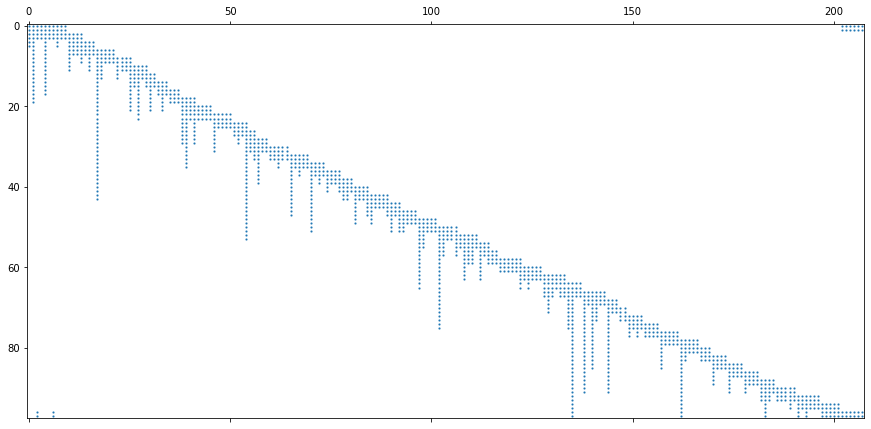

In [30]:
# Implementation of matplotlib spy function
import matplotlib.pyplot as plt
import numpy as np
 
    
plt.figure(figsize=(15, 10))
plt.spy(PVM, precision=1e-4, markersize = 1);

In [65]:
PVM.shape

(98, 171)

In [66]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:" + fmt + "}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:" + str(col_maxes[i]) + fmt + "}").format(y), end="  ")
        print("")
        
matprint(PVM[:10, :10])

277.216  159.942  167.964  273.199  282.926  189.718  171.308  255.845  -0.0001  -0.0001  
 205.42  244.005   116.21  204.016  311.843  260.836  87.5482  248.145  -0.0001  -0.0001  
279.066  159.836  168.094  273.998  283.851  189.809  171.511  256.952  223.439  382.787  
206.034  243.891  116.176   204.67  312.582  260.851  87.5413   248.31  260.187  179.234  
279.066  159.875  -0.0001  -0.0001  284.149  -0.0001  -0.0001  256.952  223.732   383.92  
206.034  243.898  -0.0001  -0.0001  312.611  -0.0001  -0.0001   248.31  260.146  180.272  
-0.0001  159.862  -0.0001  -0.0001   284.46  -0.0001  -0.0001  -0.0001  223.932   383.92  
-0.0001  243.884  -0.0001  -0.0001  312.917  -0.0001  -0.0001  -0.0001  260.269  180.272  
-0.0001  159.771  -0.0001  -0.0001  284.631  -0.0001  -0.0001  -0.0001  224.134  -0.0001  
-0.0001   243.61  -0.0001  -0.0001  313.003  -0.0001  -0.0001  -0.0001  260.237  -0.0001  


In [75]:
matprint(PVM[(PVM.round(2) == 277.21).any(axis=1), :])

-0.0001  159.592  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  251.468  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  386.696  -0.0001  224.9  -0.0001  -0.0001  176.744  277.207  180.782  284.029  286.148  258.2  309.456  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.0001  -0.00

## Comparing with PointViewMatrix.txt

In [115]:
gt_pvm = np.loadtxt('../PointViewMatrix.txt')
gt_pvm.shape

(202, 215)

In [32]:
matprint(gt_pvm[:10, :10])

   245     192     201     164     254     281     301     144     314     328  
   281     263     243     229     260     294     307     260     222     136  
245.34  192.15  201.17  164.03  254.51   281.5  301.53  143.87  314.73  328.96  
281.33  263.12  243.06  228.91  260.26  294.52  307.47   259.9  222.54  136.63  
245.63  192.19  201.35   164.1  254.84  281.88  301.91  143.71  315.52  330.12  
281.52  263.29  242.94  228.79  260.16  294.74  307.55  260.04  222.67  136.81  
245.88  192.27  201.51  164.08  255.17  282.23  302.27  143.54   316.2  331.22  
281.69  263.43  242.68   228.5  259.89  294.94  307.51  260.09  222.68   136.9  
246.08  192.31  201.66  164.15  255.51  282.53  302.58  143.37  316.94  332.36  
281.96  263.65  242.66  228.48  259.88   295.2  307.65  260.31   222.9   137.2  


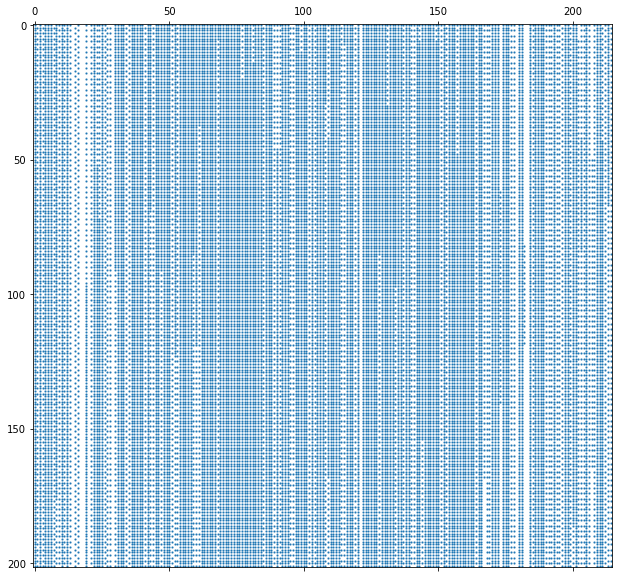

In [43]:
plt.figure(figsize=(15, 10))
plt.spy(gt_pvm, precision=200, markersize = 1);

In [78]:
def flatten_list(ls):
    import itertools
    return list(itertools.chain.from_iterable(ls))

In [86]:
orig = set(flatten_list(PVM.round(2)))
gt = set(flatten_list(gt_pvm.round(2)[:100, :]))
len(orig), len(gt)

(919, 15974)

In [87]:
len(orig.intersection(gt))

443

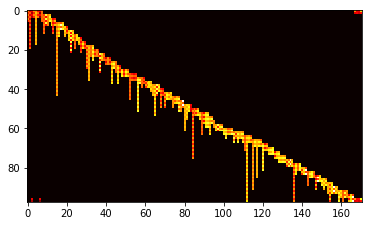

In [88]:
plt.imshow(PVM.round(2), cmap='hot', interpolation='nearest')
plt.show()

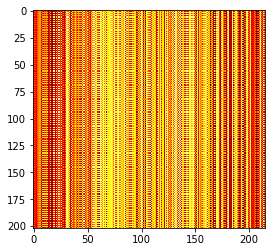

In [89]:
plt.imshow(gt_pvm.round(2), cmap='hot', interpolation='nearest')
plt.show()

# Chaining check

Before filtering neighbours: 543. After: 450
Before filtering neighbours: 548. After: 447


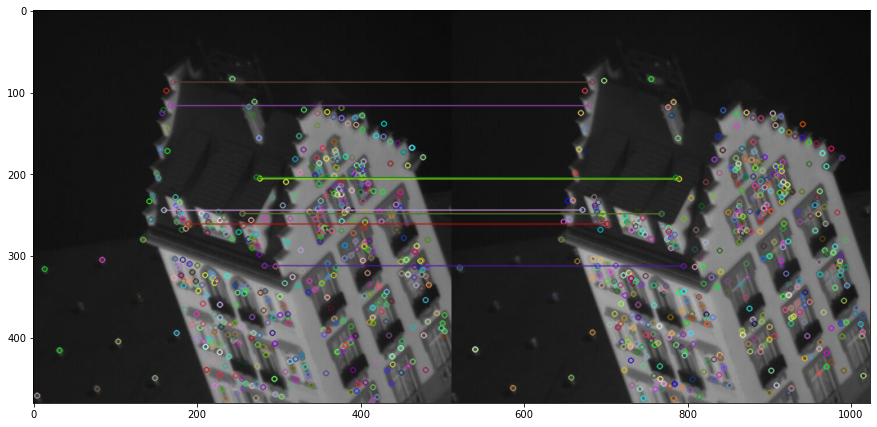

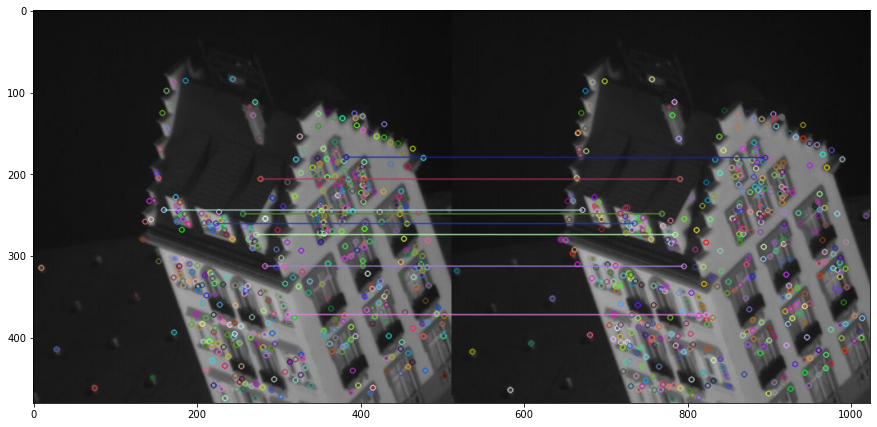

In [141]:
image1 = cv.imread("../Data/House/frame00000001.png")
image2 = cv.imread("../Data/House/frame00000002.png")
image3 = cv.imread("../Data/House/frame00000003.png")

_, matched_points12, matched_points21, _, _ = keypoint_matcher(
    image1, image2, n_points=8, random_selection=False, filter_neighbours=True, draw_matches=True)

_, matched_points23, matched_points32, _, _ = keypoint_matcher(
    image2, image3, n_points=8, random_selection=False, filter_neighbours=True, draw_matches=True)

In [144]:
sorted(matched_points21, key=lambda x: x[0])

[(159.84326171875, 243.7429656982422),
 (168.09413146972656, 116.17607879638672),
 (171.5107879638672, 87.54129791259766),
 (189.80917358398438, 260.8506774902344),
 (256.4742431640625, 248.44085693359375),
 (273.99774169921875, 204.6702880859375),
 (277.9999084472656, 205.9047088623047),
 (283.4146728515625, 312.2811279296875)]

In [145]:
sorted(matched_points23, key=lambda x: x[0])

[(159.84326171875, 243.7429656982422),
 (223.43911743164062, 260.18743896484375),
 (256.4742431640625, 248.44085693359375),
 (272.61663818359375, 273.8099670410156),
 (277.9999084472656, 205.9047088623047),
 (283.4146728515625, 312.2811279296875),
 (311.4600830078125, 371.3696594238281),
 (382.78680419921875, 179.23373413085938)]

In [11]:
PVM[2, :20]

array([ 2.77999908e+02,  1.59843262e+02,  1.68094131e+02,  2.73997742e+02,
        2.83414673e+02,  1.89809174e+02,  1.71510788e+02,  2.56474243e+02,
        2.23439117e+02,  3.82786804e+02,  2.77999908e+02,  2.72616638e+02,
        2.83414673e+02,  3.11460083e+02,  2.56474243e+02,  1.59843262e+02,
       -1.00000000e-04, -1.00000000e-04, -1.00000000e-04, -1.00000000e-04])

In [12]:
PVM[3, :20]

array([ 2.05904709e+02,  2.43742966e+02,  1.16176079e+02,  2.04670288e+02,
        3.12281128e+02,  2.60850677e+02,  8.75412979e+01,  2.48440857e+02,
        2.60187439e+02,  1.79233734e+02,  2.05904709e+02,  2.73809967e+02,
        3.12281128e+02,  3.71369659e+02,  2.48440857e+02,  2.43742966e+02,
       -1.00000000e-04, -1.00000000e-04, -1.00000000e-04, -1.00000000e-04])

# Structure from motion

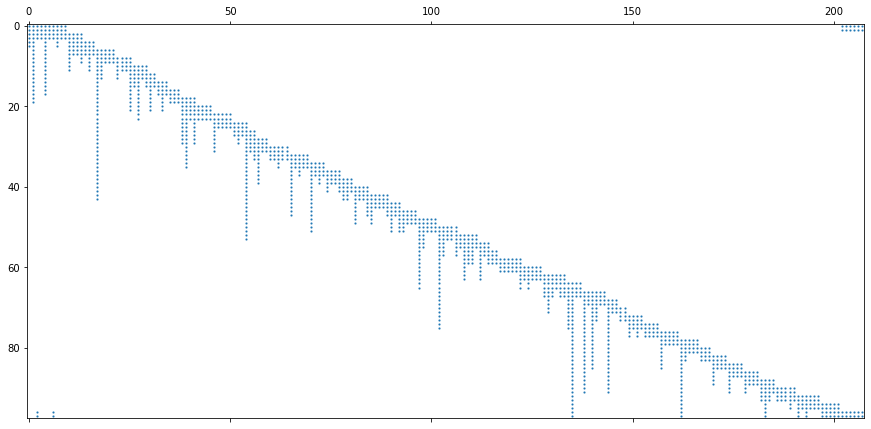

In [33]:
plt.figure(figsize=(15, 10))
plt.spy(PVM, precision=1e-4, markersize = 1);

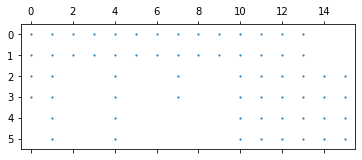

In [104]:
plt.figure(figsize=(6, 3))
plt.spy(PVM[2:8, :16], precision=1e-4, markersize = 1);

In [41]:
from sfm import factorize_and_stitch

## 3 images

In [116]:
gt_pvm

array([[245.  , 192.  , 201.  , ..., 264.  , 236.  , 176.  ],
       [281.  , 263.  , 243.  , ..., 154.  , 443.  , 318.  ],
       [245.34, 192.15, 201.17, ..., 263.95, 235.51, 175.38],
       ...,
       [258.63, 250.27, 212.03, ..., 162.19, 466.82, 311.19],
       [257.22, 184.28, 208.67, ..., 294.9 , 159.34, 129.84],
       [258.33, 250.17, 211.88, ..., 162.32, 466.73, 311.17]])

In [77]:
PVM.shape

(98, 208)

point_idx 0 image_idx 0 checking indices (0, 6, 0, 10)


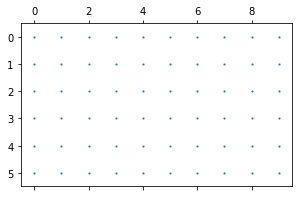

2m:  6
n:  10
point_idx 4 image_idx 2 checking indices (2, 8, 4, 14)


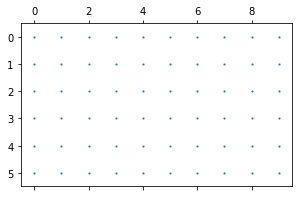

2m:  6
n:  10
point_idx 8 image_idx 4 checking indices (4, 10, 8, 18)


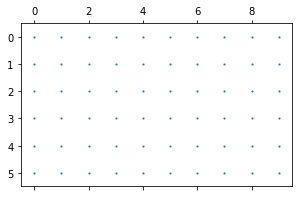

2m:  6
n:  10
point_idx 12 image_idx 6 checking indices (6, 12, 12, 22)


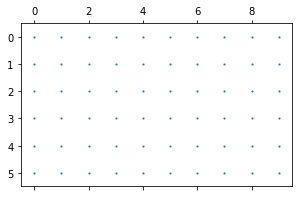

2m:  6
n:  10
point_idx 16 image_idx 8 checking indices (8, 14, 16, 26)


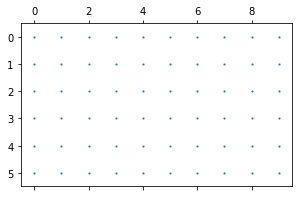

2m:  6
n:  10
point_idx 20 image_idx 10 checking indices (10, 16, 20, 30)


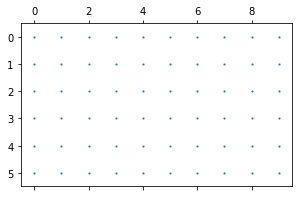

2m:  6
n:  10
point_idx 24 image_idx 12 checking indices (12, 18, 24, 34)


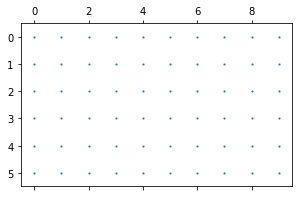

2m:  6
n:  10
point_idx 28 image_idx 14 checking indices (14, 20, 28, 38)


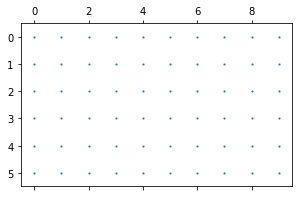

2m:  6
n:  10
point_idx 32 image_idx 16 checking indices (16, 22, 32, 42)


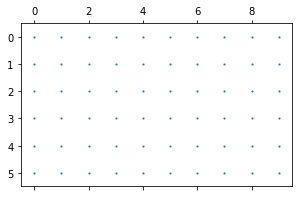

2m:  6
n:  10
point_idx 36 image_idx 18 checking indices (18, 24, 36, 46)


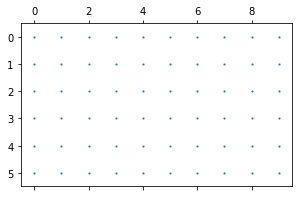

2m:  6
n:  10
point_idx 40 image_idx 20 checking indices (20, 26, 40, 50)


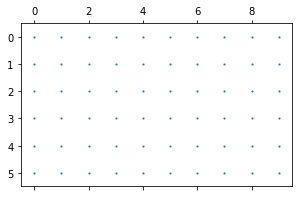

2m:  6
n:  10
point_idx 44 image_idx 22 checking indices (22, 28, 44, 54)


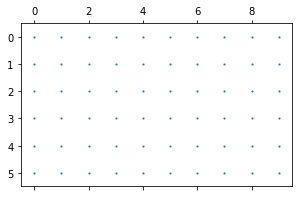

2m:  6
n:  10
point_idx 48 image_idx 24 checking indices (24, 30, 48, 58)


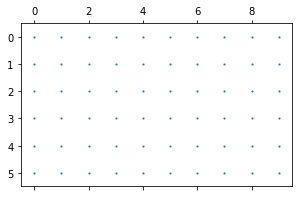

2m:  6
n:  10
point_idx 52 image_idx 26 checking indices (26, 32, 52, 62)


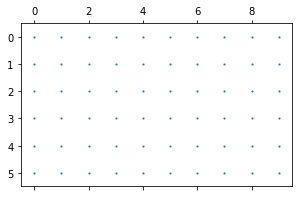

2m:  6
n:  10
point_idx 56 image_idx 28 checking indices (28, 34, 56, 66)


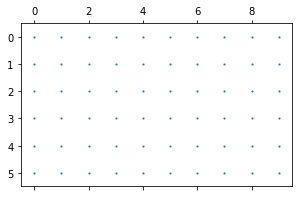

2m:  6
n:  10
point_idx 60 image_idx 30 checking indices (30, 36, 60, 70)


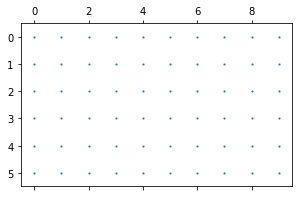

2m:  6
n:  10
point_idx 64 image_idx 32 checking indices (32, 38, 64, 74)


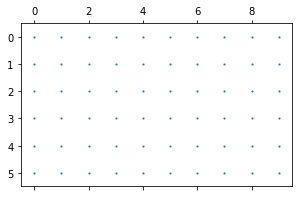

2m:  6
n:  10
point_idx 68 image_idx 34 checking indices (34, 40, 68, 78)


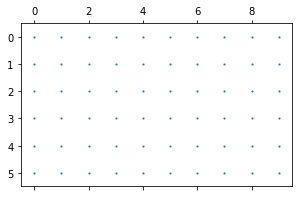

2m:  6
n:  10
point_idx 72 image_idx 36 checking indices (36, 42, 72, 82)


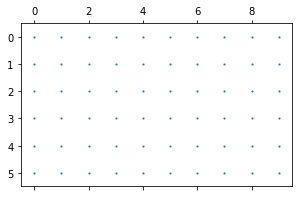

2m:  6
n:  10
point_idx 76 image_idx 38 checking indices (38, 44, 76, 86)


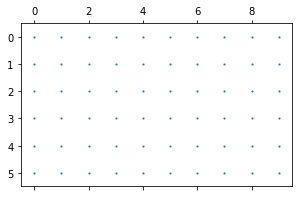

2m:  6
n:  10
point_idx 80 image_idx 40 checking indices (40, 46, 80, 90)


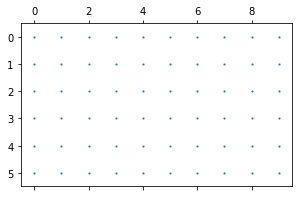

2m:  6
n:  10
point_idx 84 image_idx 42 checking indices (42, 48, 84, 94)


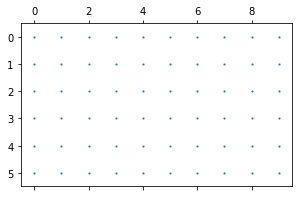

2m:  6
n:  10
point_idx 88 image_idx 44 checking indices (44, 50, 88, 98)


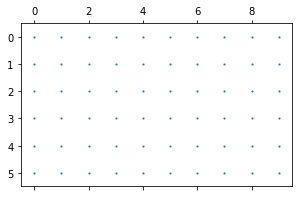

2m:  6
n:  10
point_idx 92 image_idx 46 checking indices (46, 52, 92, 102)


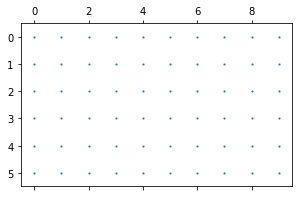

2m:  6
n:  10
point_idx 96 image_idx 48 checking indices (48, 54, 96, 106)


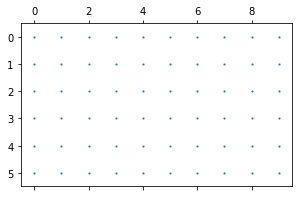

2m:  6
n:  10
point_idx 100 image_idx 50 checking indices (50, 56, 100, 110)


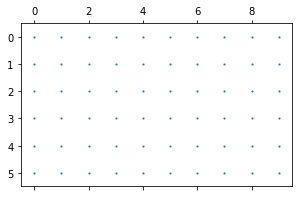

2m:  6
n:  10
point_idx 104 image_idx 52 checking indices (52, 58, 104, 114)


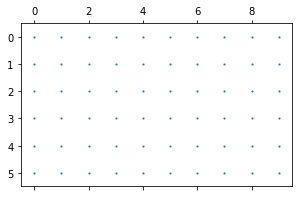

2m:  6
n:  10
point_idx 108 image_idx 54 checking indices (54, 60, 108, 118)


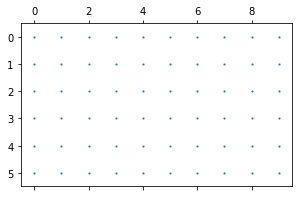

2m:  6
n:  10
point_idx 112 image_idx 56 checking indices (56, 62, 112, 122)


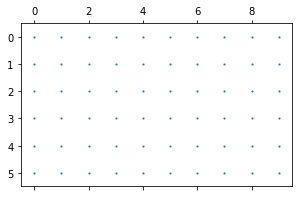

2m:  6
n:  10
point_idx 116 image_idx 58 checking indices (58, 64, 116, 126)


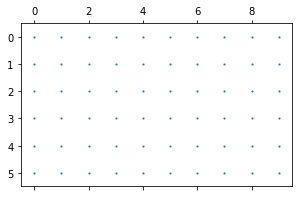

2m:  6
n:  10
point_idx 120 image_idx 60 checking indices (60, 66, 120, 130)


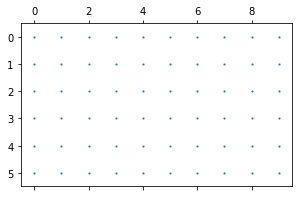

2m:  6
n:  10
point_idx 124 image_idx 62 checking indices (62, 68, 124, 134)


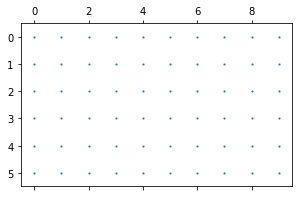

2m:  6
n:  10
point_idx 128 image_idx 64 checking indices (64, 70, 128, 138)


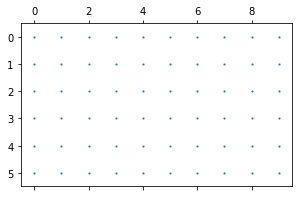

2m:  6
n:  10
point_idx 132 image_idx 66 checking indices (66, 72, 132, 142)


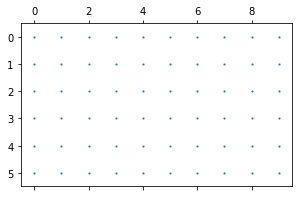

2m:  6
n:  10
point_idx 136 image_idx 68 checking indices (68, 74, 136, 146)


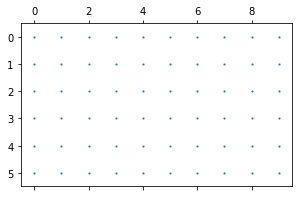

2m:  6
n:  10
point_idx 140 image_idx 70 checking indices (70, 76, 140, 150)


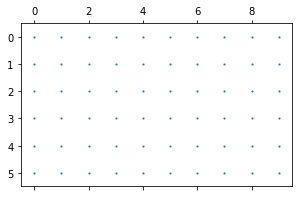

2m:  6
n:  10
point_idx 144 image_idx 72 checking indices (72, 78, 144, 154)


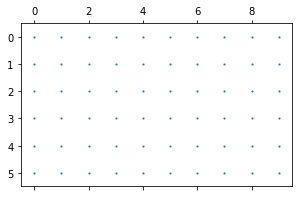

2m:  6
n:  10
point_idx 148 image_idx 74 checking indices (74, 80, 148, 158)


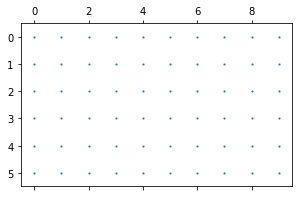

2m:  6
n:  10
point_idx 152 image_idx 76 checking indices (76, 82, 152, 162)


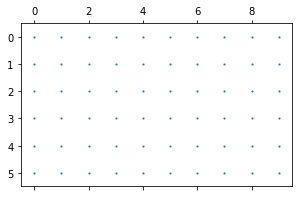

2m:  6
n:  10
point_idx 156 image_idx 78 checking indices (78, 84, 156, 166)


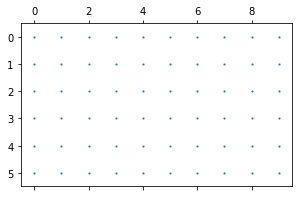

2m:  6
n:  10
point_idx 160 image_idx 80 checking indices (80, 86, 160, 170)


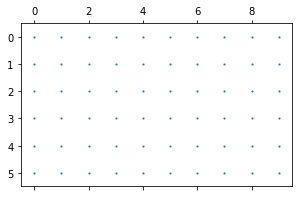

2m:  6
n:  10
point_idx 164 image_idx 82 checking indices (82, 88, 164, 174)


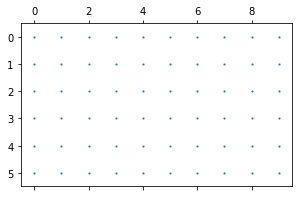

2m:  6
n:  10
point_idx 168 image_idx 84 checking indices (84, 90, 168, 178)


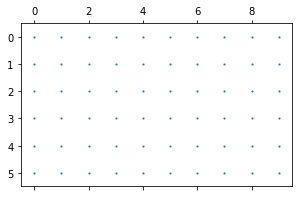

2m:  6
n:  10
point_idx 172 image_idx 86 checking indices (86, 92, 172, 182)


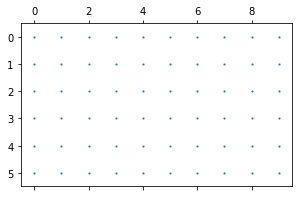

2m:  6
n:  10


In [119]:
frame_shape = (6, 10)
s_list = []
for point_idx, image_idx in enumerate(range(0, PVM.shape[0]-10, 2)):
    point_idx = point_idx*4
    print('point_idx', point_idx, 'image_idx', image_idx,
          f'checking indices {image_idx,image_idx+frame_shape[0], point_idx,point_idx+frame_shape[1]}')
    
    plt.figure(figsize=(6, 3))
    plt.spy(gt_pvm[image_idx:image_idx+frame_shape[0],
                point_idx:point_idx+frame_shape[1]], precision=1e-4, markersize=1)
    plt.show()
    
    S = factorize_and_stitch(gt_pvm[image_idx:image_idx+frame_shape[0],
                                 point_idx:point_idx+frame_shape[1]])
    s_list.append(S)

procrustes receives two matrices. each matrix, n rows represent points in k (columns) space

In [120]:
from scipy.spatial import procrustes
from copy import deepcopy

In [121]:
geom_points_list = []
for S in s_list[1:]:
    mtx1, mtx2, disparity = procrustes(s_list[0].T, S.T)
    new_point = o3d.geometry.PointCloud()
    new_point.points = o3d.utility.Vector3dVector(mtx2)
    geom_points_list.append(deepcopy(new_point))

In [122]:
main = o3d.geometry.PointCloud()
main.points = o3d.utility.Vector3dVector(mtx1)
# o3d.visualization.draw_geometries([main])    

In [123]:
o3d.visualization.draw_geometries([main] + geom_points_list)    

In [76]:
# import open3d as o3d

# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(mtx1)

# pcd2 = o3d.geometry.PointCloud()
# pcd2.points = o3d.utility.Vector3dVector(mtx2)

# pcd3 = o3d.geometry.PointCloud()
# pcd3.points = o3d.utility.Vector3dVector(mtx3)

# o3d.visualization.draw_geometries([pcd, pcd2, pcd3])    

## 4 images